# **Оптимизация логистической сети для снижения углеродного следа**

## Цель работы 
Разработать стратегию по оптимизации перевозок и снижению углеродного следа логистической сети компании.

## Задачи
1. Провести анализ текущей логистической сети компании и рассчитать ее углеродный след
2. Разработать модель для расчета выбросов CO2 для различных типов транспорта и маршрутов
3. Создать оптимизационную модель, минимизирующую углеродный след
4. Разработать интерактивную геопространственную визуализацию текущей и оптимизированной логистической сети
5. Предложить план поэтапного внедрения оптимизированной логистической стратегии

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('logistics_dataset.csv')

In [3]:
display(df.head(5))
display(df.describe())
display(df.info())

,origin,destination,distance_km,transport_type,transport_type_code,cargo_weight_tons,commodity,commodity_code,year,ton_km,emission_factor_g_tkm,co2_emissions_kg,co2_per_liter,fuel_consumption_liters,co2_per_km,co2_per_ton_km,fuel_efficiency_l_per_100km,environmental_class
0,Birmingham AL,Birmingham AL,0.099847,Truck,1,51.863434,Live animals/fish,1,2018,5.178422,71,0.367668,2.68,0.137190,3.682304,0.071,137.399396,medium
1,Birmingham AL,Rest of AL,0.199574,Truck,1,392.072310,Live animals/fish,1,2018,78.247586,71,5.555579,2.68,2.072977,27.837134,0.071,1038.699030,medium
2,Birmingham AL,Rest of FL,0.523536,Truck,1,1.383202,Live animals/fish,1,2018,0.724156,71,0.051415,2.68,0.019185,0.098207,0.071,3.664453,medium
3,Birmingham AL,Atlanta GA,0.275847,Truck,1,12.698528,Live animals/fish,1,2018,3.502851,71,0.248702,2.68,0.092799,0.901595,0.071,33.641623,medium
4,Birmingham AL,Rest of GA,0.392969,Truck,1,5.220302,Live animals/fish,1,2018,2.051417,71,0.145651,2.68,0.054347,0.370641,0.071,13.829905,medium


,distance_km,transport_type_code,cargo_weight_tons,commodity_code,year,ton_km,emission_factor_g_tkm,co2_emissions_kg,co2_per_liter,fuel_consumption_liters,co2_per_km,co2_per_ton_km,fuel_efficiency_l_per_100km
count,1.174504e+07,1.174504e+07,1.174504e+07,1.174504e+07,1.174504e+07,1.174504e+07,1.174504e+07,1.174504e+07,1.174504e+07,1.174504e+07,1.174504e+07,1.174504e+07,1.174504e+07
mean,1.807235e+00,2.789125e+00,1.175660e+01,2.770580e+01,2.020995e+03,5.161490e+00,1.689550e+02,2.060347e-01,2.892790e+00,7.560980e-02,5.914539e-01,1.689550e-01,2.193617e+01
std,1.539145e+00,1.696313e+00,3.570183e+02,1.097419e+01,2.005590e+00,1.683527e+02,2.249644e+02,5.370223e+00,2.226928e-01,1.956907e+00,2.153053e+01,2.249644e-01,8.027781e+02
min,1.241512e-03,1.000000e+00,1.000000e-06,1.000000e+00,2.018000e+03,1.609000e-06,4.000000e+00,6.436000e-09,2.680000e+00,2.306810e-09,4.000000e-09,4.000000e-03,1.433692e-07
25%,6.620766e-01,1.000000e+00,7.760000e-04,2.300000e+01,2.019000e+03,8.785140e-04,1.600000e+01,8.254170e-05,2.680000e+00,2.803983e-05,6.982500e-05,1.600000e-02,2.370476e-03
50%,1.395759e+00,2.000000e+00,1.002400e-02,3.100000e+01,2.021000e+03,1.300394e-02,7.100000e+01,8.043230e-04,2.680000e+00,2.741985e-04,6.019200e-04,7.100000e-02,2.055582e-02
75%,2.540526e+00,4.000000e+00,1.345210e-01,3.600000e+01,2.023000e+03,1.917413e-01,7.100000e+01,9.976499e-03,3.100000e+00,3.509684e-03,7.937871e-03,7.100000e-02,2.819839e-01
max,1.560858e+01,7.000000e+00,1.337911e+05,4.300000e+01,2.024000e+03,1.306329e+05,5.700000e+02,2.474162e+03,3.150000e+00,9.231948e+02,9.499170e+03,5.700000e-01,3.544466e+05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11745040 entries, 0 to 11745039
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   origin                       object 
 1   destination                  object 
 2   distance_km                  float64
 3   transport_type               object 
 4   transport_type_code          int64  
 5   cargo_weight_tons            float64
 6   commodity                    object 
 7   commodity_code               int64  
 8   year                         int64  
 9   ton_km                       float64
 10  emission_factor_g_tkm        int64  
 11  co2_emissions_kg             float64
 12  co2_per_liter                float64
 13  fuel_consumption_liters      float64
 14  co2_per_km                   float64
 15  co2_per_ton_km               float64
 16  fuel_efficiency_l_per_100km  float64
 17  environmental_class          object 
dtypes: float64(9), int64(4), object(5)
memor

None

### Проверка на аномалии

In [4]:
print("ИСХОДНЫЕ ДАННЫЕ ")
print(f"Всего записей: {len(df):,}")
print(f"Период данных: с {df['year'].min()} по {df['year'].max()} год")

# Аномалии
numeric_cols = [
    'distance_km',
    'cargo_weight_tons',
    'ton_km',
    'emission_factor_g_tkm',
    'co2_emissions_kg',
    'fuel_consumption_liters',
    'co2_per_km',
    'co2_per_ton_km',
    'fuel_efficiency_l_per_100km'
]
bad = 0
for col in numeric_cols:
    bad += df[df[col] <= 0]
print('Найдено аномалий: ', len(bad))
print('Пропущенных значений: ', df.isna().sum().sum())

ИСХОДНЫЕ ДАННЫЕ 
Всего записей: 11,745,040
Период данных: с 2018 по 2024 год
Найдено аномалий:  0
Пропущенных значений:  0


## 1. Анализ текущей логистической сети компании и ее углеродный след

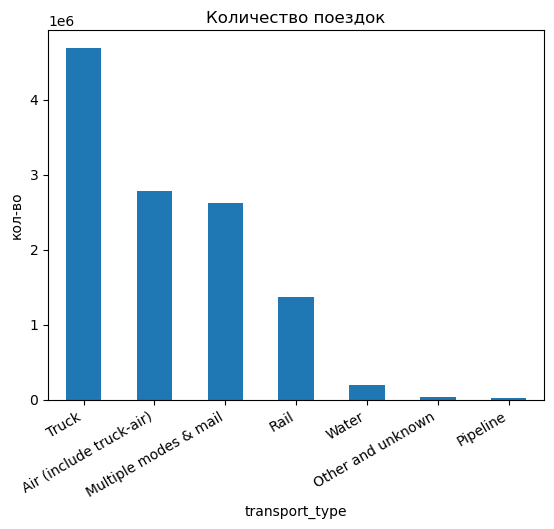

In [5]:
by_transport = df['transport_type'].value_counts()
ax = by_transport.plot(kind='bar', title='Количество поездок', ylabel='кол-во')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

**Замечания:**
* Основной объём перевозок осуществляется автотранспортом — это ключевой способ доставки.
* На втором месте — авиа и мультимодальные перевозки, что говорит о разнообразной и гибкой логистике.
* Железная дорога используется активно, особенно для дальних и тяжёлых грузов.
* Водный транспорт применяется реже, вероятно, для специфических маршрутов.
* Трубопровод и прочие типы транспорта занимают минимальную долю - они узкоспециализированы.

In [6]:
total_emissions_kg = df['co2_emissions_kg'].sum()
print(f"Общие выбросы CO2: {total_emissions_kg:,.2f} тонн")

Общие выбросы CO2: 2,419,885.79 тонн


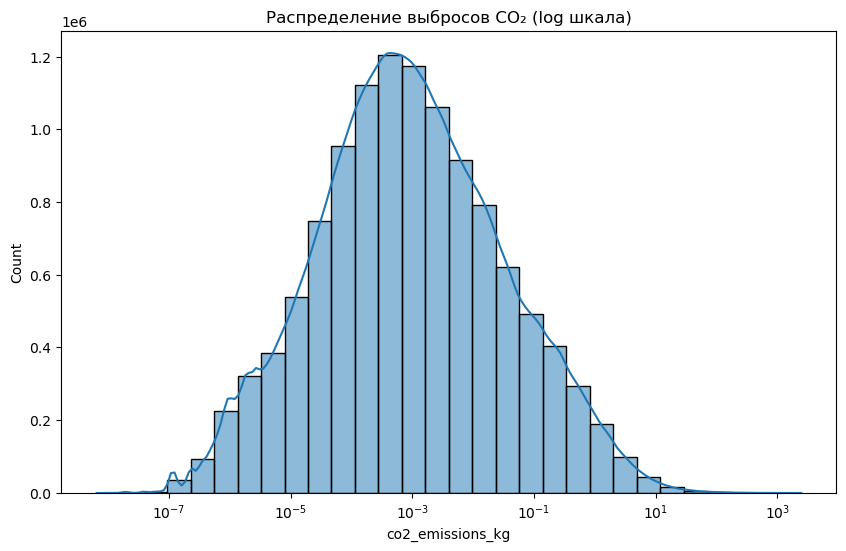

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['co2_emissions_kg'], bins=30, kde=True, log_scale = True)
plt.title('Распределение выбросов CO₂ (log шкала)')
plt.show()

**Замечания**
 1. Обычное распределение выбросов (co2_emissions_kg) сильно скошено вправо:  
* Основная масса значений сконцентрирована около нуля.
* Хвост уходит далеко вправо — т.е. присутствуют экстремально большие значения.

2. После логарифмирования:
* Распределение становится близким к нормальному.
* Центр (мода) распределения оказывается в районе 0.001 (в линейной шкале) — это указывает на то, что наиболее "типичный" объём выбросов — порядка 1 грамма CO₂.

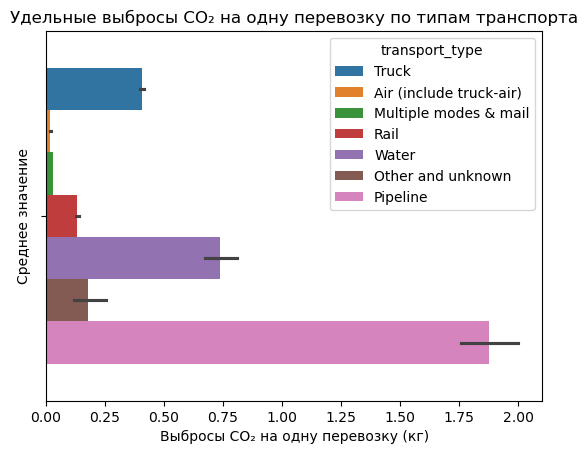

In [8]:
sns.barplot(df, x='co2_emissions_kg', hue='transport_type')
plt.title('Удельные выбросы CO₂ на одну перевозку по типам транспорта')
plt.xlabel('Выбросы CO₂ на одну перевозку (кг)')
plt.ylabel('Среднее значение')
plt.show()

**Краткий анализ:**
* Трубопровод показывает наибольшие выбросы CO₂ в расчёте на одну перевозку, что может быть связано с высокой энергозатратностью перекачки или редкой, но массивной транспортировкой.
* Водный транспорт и грузовики тоже демонстрируют относительно средние выбросы на поездку. Но без более подробного анализа трудно сделать какие-то выводы.

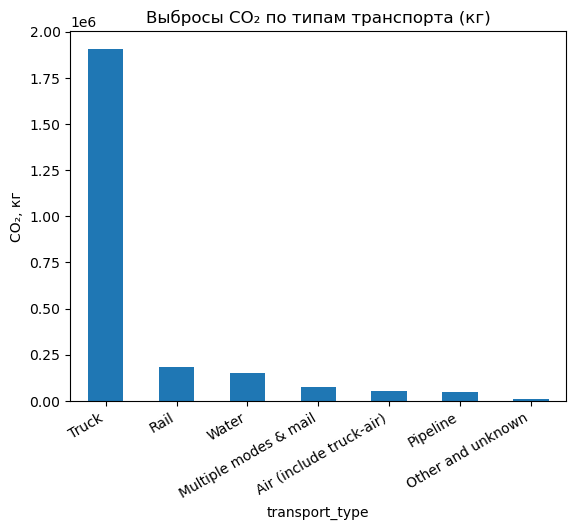

In [9]:
by_transport = df.groupby('transport_type')['co2_emissions_kg'].sum().sort_values(ascending=False)
ax = by_transport.plot(kind='bar', title='Совокупные выбросы CO₂ по типам транспорта (кг)', ylabel='CO₂, кг')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

**Теперь мы можем сделать какие-то выводы:**
1. Грузовики (Truck) вносят самый большой вклад в общий объём выбросов, что связано с их огромным количеством поездок и значительным уровнем выбросов на каждую.

2. Железная дорога (Rail) и водный транспорт (Water) занимают второе и третье места по совокупным выбросам, несмотря на более низкие выбросы на одну поездку, благодаря большему общему объёму перевозок.

3. Мультимодальные перевозки и воздушный транспорт имеют сравнительно меньший суммарный вклад в выбросы.

4. Трубопроводы, хоть и имеют высокий средний выброс на поездку, в совокупности выбрасывают значительно меньше CO₂ из-за меньшего общего объёма перевозок.

Данные показывают, что для уменьшения общего экологического следа стоит особенно обращать внимание на грузовики и железнодорожные перевозки.

In [10]:
# fuel_efficiency_l_per_100km - эффективность расхода топлива
# co2_per_ton_km - удельное количество CO₂ на тонно-километр (ключевой показатель!!!)

efficiency_by_type = df.groupby('transport_type')[['fuel_efficiency_l_per_100km', 'co2_per_ton_km']].mean()
display(efficiency_by_type)

,fuel_efficiency_l_per_100km,co2_per_ton_km
transport_type,,
Air (include truck-air),0.313640,0.570
Multiple modes & mail,0.661088,0.012
Other and unknown,43.462755,0.080
Pipeline,157.147786,0.004
Rail,4.729076,0.016
Truck,50.442460,0.071
Water,30.798571,0.035


#### Основные выводы:
**1. Авиация — наибольший выброс CO₂ на тонно-километр**

* Хотя у авиации низкий расход топлива на 100 км (в пересчёте на тонну), выбросы на 1 тонно-км самые высокие (0.570 г/т-км).
* Это указывает на высокую интенсивность выбросов при низкой грузоподъёмности.

**2. Пайплайн — самый экологичный в расчёте на CO₂**

* У него самый низкий показатель выбросов (0.004 г/т-км), несмотря на очень высокий расход топлива — возможно, из-за большого объёма и низкой скорости.

**3. Железная дорога и мультимодальные перевозки — эффективные варианты**

* Rail и Multiple modes — оба показывают низкие значения как по топливной эффективности, так и по выбросам.

**4. Автотранспорт и водный транспорт — умеренно неэффективны**

**5. Truck и Water имеют высокий расход топлива и средние значения выбросов, при этом грузопоток у них обычно велик.**

* Это указывает на потенциал для оптимизации (например, за счёт гибридов или перехода на ЖД/судоходство).

In [11]:
# Исследуем наиболее популярные маршруты и города отправления
top_routes = df.groupby(['origin', 'destination'])['co2_emissions_kg'].sum().nlargest(10)
top_countries = df['origin'].value_counts().head(10)

print('Топ-10 маршрутов по совокупному выбросу CO₂')
display(top_routes)
print('\nТоп-10 точек отправления по совокупному выбросу CO₂')
display(top_countries)

Топ-10 маршрутов по совокупному выбросу CO₂


origin        destination   
Rest of TX    Rest of TX        53856.648977
Iowa          Iowa              34777.440990
Rest of IL    Rest of IL        22181.785364
Rest of WI    Rest of WI        20108.753037
Rest of NE    Rest of NE        19778.866381
Rest of MN    Rest of MN        17623.654309
Rest of KS    Rest of KS        15855.267575
Rest of FL    Rest of FL        14917.783843
Alaska        Los Angeles CA    14316.148357
North Dakota  North Dakota      14278.213651
Name: co2_emissions_kg, dtype: float64


Топ-10 точек отправления по совокупному выбросу CO₂


origin
Los Angeles CA                            362936
New York NY-NJ-CT-PA (NJ Part)            307272
Chicago IL-IN-WI (IL Part)                293034
Houston TX                                268935
New York NY-NJ-CT-PA (NY Part)            232692
Miami FL                                  231553
San Francisco CA                          223063
Detroit MI                                212208
Virginia Beach-Norfolk VA-NC (VA Part)    199356
Louisville KY-IN (KY Part)                194287
Name: count, dtype: int64

**Основные выводы:**
1. Высокие выбросы внутри регионов ("Rest of _")   
Топ-10 маршрутов с максимальными выбросами — это перевозки внутри одного и того же региона, например: Rest of TX → Rest of TX. Такие зоны охватывают обширные сельские или слабоурбанизированные территории, где грузы перевозятся на большие расстояния без выхода за пределы региона.

3. Дальние межрегиональные маршруты    
Пример: Аляска → Лос-Анджелес — выбивается из общей картины, но объясняется экстремально длинным маршрутом.

4. Лидеры по выбросам среди отправителей — мегаполисы и логистические хабы  
Города вроде Лос-Анджелеса, Нью-Йорка, Чикаго, Хьюстона и Майами — основные точки отправки с наибольшими совокупными выбросами.  
Причина: концентрация складов, портов, транспортных развязок и высокая интенсивность грузопотока.

<Axes: title={'center': 'Выбросы CO2 по экологическим классам'}, xlabel='environmental_class', ylabel='CO2, кг'>

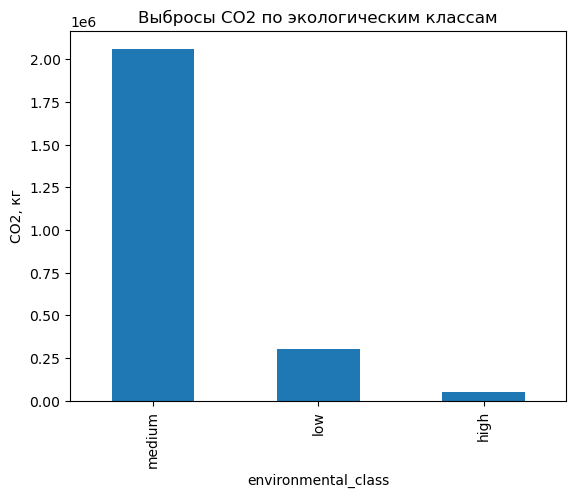

In [12]:
eco_class = df.groupby('environmental_class')['co2_emissions_kg'].sum().sort_values(ascending=False)
eco_class.plot(kind='bar', title='Выбросы CO2 по экологическим классам', ylabel='CO2, кг')

**Замечания:**  
`high:` Перевозок с высоким уровнем удельных выбросов CO₂ немного, поскольку к этой категории в основном относится авиация, которая не является доминирующим видом транспорта.  
`medium:` Большая часть перевозок относится к среднему классу экологичности, так как основную долю составляют грузовики и водный транспорт — представители средней категории по выбросам.  
`low:` Высокоэкологичные перевозки встречаются реже, поскольку такие технологии, как трубопроводы, железнодорожный и мультимодальный транспорт, требуют больших затрат и используются в меньших объёмах.

In [14]:
inefficient_routes = df.sort_values(by='co2_per_ton_km', ascending=False).head(10)
display(inefficient_routes)

,origin,destination,distance_km,transport_type,transport_type_code,cargo_weight_tons,commodity,commodity_code,year,ton_km,emission_factor_g_tkm,co2_emissions_kg,co2_per_liter,fuel_consumption_liters,co2_per_km,co2_per_ton_km,fuel_efficiency_l_per_100km,environmental_class,computed_ton_km
11745028,Seattle WA,Los Angeles CA,1.537527,Air (include truck-air),4,0.223162,Mixed freight,43,2024,0.343118,570,0.195577,3.15,0.062088,0.127202,0.57,4.038170,high,0.343118
11745031,Portland OR-WA (WA Part),Los Angeles CA,1.353826,Air (include truck-air),4,0.020247,Mixed freight,43,2024,0.027411,570,0.015624,3.15,0.004960,0.011541,0.57,0.366374,high,0.027411
11745033,Rest of WA,Los Angeles CA,1.476539,Air (include truck-air),4,0.063723,Mixed freight,43,2024,0.094089,570,0.053631,3.15,0.017026,0.036322,0.57,1.153083,high,0.094089
11745034,West Virginia,New York NY-NJ-CT-PA (NY Part),0.553472,Air (include truck-air),4,0.000532,Mixed freight,43,2024,0.000294,570,0.000168,3.15,0.000053,0.000303,0.57,0.009627,high,0.000294
7516610,Chicago IL-IN-WI (IL Part),Portland OR-WA (OR Part),2.816228,Air (include truck-air),4,0.005054,Textiles/leather,30,2022,0.014233,570,0.008113,3.15,0.002576,0.002881,0.57,0.091453,high,0.014233
7516613,Chicago IL-IN-WI (IL Part),Rest of OR,2.769040,Air (include truck-air),4,0.002971,Textiles/leather,30,2022,0.008227,570,0.004689,3.15,0.001489,0.001693,0.57,0.053761,high,0.008227
7516615,Chicago IL-IN-WI (IL Part),Philadelphia PA-NJ-DE-MD (PA Part),1.067957,Air (include truck-air),4,0.156001,Textiles/leather,30,2022,0.166602,570,0.094963,3.15,0.030147,0.088921,0.57,2.822875,high,0.166602
7516617,Chicago IL-IN-WI (IL Part),Pittsburgh PA-OH-WV (PA Part),0.686439,Air (include truck-air),4,0.089001,Textiles/leather,30,2022,0.061094,570,0.034823,3.15,0.011055,0.050731,0.57,1.610494,high,0.061094
35,Alaska,Alaska,0.588570,Air (include truck-air),4,0.014251,Live animals/fish,1,2018,0.008388,570,0.004781,3.15,0.001518,0.008123,0.57,0.257875,high,0.008388
7516620,Chicago IL-IN-WI (IL Part),New York NY-NJ-CT-PA (PA Part),1.039808,Air (include truck-air),4,0.032890,Textiles/leather,30,2022,0.034199,570,0.019494,3.15,0.006188,0.018747,0.57,0.595152,high,0.034199


> Самые неэкологичные маршруты - авиаперевозки, как ранее уже говорилось.

## 2. Модель для расчета выбросов CO2 для различных типов транспорта и маршрутов

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

### Уменьшение размерности датасета до 300 тыс.

In [16]:
try:
    df_sample = pd.read_csv('sampled_dataset.csv')
    
except FileNotFoundError:
    print("Файл 'sampled_dataset.csv' не найден.")
    df['stratification'] = df['transport_type'].astype(str) + "_" + df['year'].astype(str) + "_" + df['environmental_class']
    _, df_sample = train_test_split(df, stratify=df['stratification'], test_size=300000, random_state=42)
    df_sample = df_sample.drop(columns=['stratification'])
    df_sample.to_csv("sampled_dataset.csv", index=False)
    
except Exception as e:
    print(f"Произошла ошибка: {e}")

### 2.1 Аналитическая модель

1. Каждому типу транспорта соответствует свой показатель удельных выбросов на тонно-километр
2. Тогда выбросы рассчитываются по формуле:  
   **co2_per_ton_km * cargo_weight_tons * distance_km**
4. Или по простому:  
   **удельный кооэффициент * вес * расстояние**

In [17]:
# Функция выводит метрики модели
def get_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")

In [18]:
# здесь каждому типу транспорта соответствует его показатель co2_per_ton_km
emission_factors = df_sample.groupby('transport_type')['co2_per_ton_km'].max().to_dict() # что max, что min - значение там одно, поэтому без разницы
emission_factors

{'Air (include truck-air)': 0.57,
 'Multiple modes & mail': 0.012,
 'Other and unknown': 0.08,
 'Pipeline': 0.004,
 'Rail': 0.016,
 'Truck': 0.071,
 'Water': 0.035}

In [20]:
an_df = df_sample[['cargo_weight_tons', 'distance_km', 'transport_type', 'co2_emissions_kg']].copy()
print('Входные данные (пример):')
display(an_df.head(3))
an_df['co2_per_ton_km'] = an_df['transport_type'].map(emission_factors)
an_df['emissions'] = an_df['co2_per_ton_km'] * an_df['cargo_weight_tons'] * an_df['distance_km']
get_metrics(an_df['emissions'].tolist(), an_df['co2_emissions_kg'].tolist())

Входные данные (пример):


,cargo_weight_tons,distance_km,transport_type,co2_emissions_kg
0,0.952079,0.034347,Truck,0.002322
1,0.000030,1.716267,Truck,0.000004
2,0.001874,4.025076,Air (include truck-air),0.004300


MAE:  0.00
RMSE: 0.00
R²:   1.0000


Это точное аналитическое решение. Далее рассмотрим задачу, когда удельный коэффициент выбросов на вид транспорта нам неизвестен.

### Корреляция с целевым признаком

In [21]:
# Попробуем объединить товары в группы и использовать в качестве нового признака
code_means = df_sample.groupby('commodity_code')['co2_emissions_kg'].mean()
df_sample['commodity_group'] = pd.qcut(code_means[df_sample['commodity_code']].values, q=3, labels=False)

Целевая переменная - **co2_emissions_kg** (выбросы СО2)  


Признаки, доступные к рассмотрению:  
* `distance_km` - длина маршрута  
* `cargo_weight_tons` - вес груза
* `transport_type` - тип транспорта
* `commodity_code` - тип товара
* `year` - год
* `ton_km` -тонно-километры - вычисляются из доступных выше признаков веса и расстояния
* `commodity_group` - товары раскиданы по 3 группам по принципу среднего показателя выбросов для транспортировки

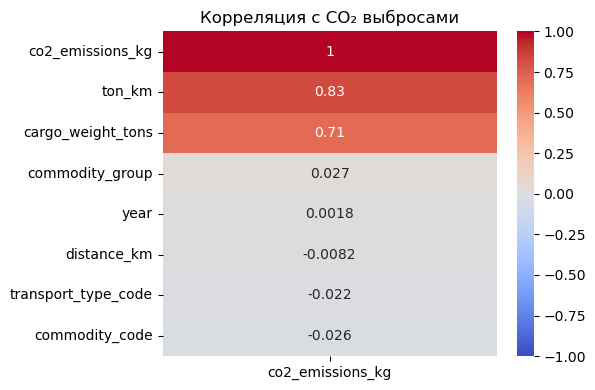

In [22]:
# Расчетные признаки считаем недоступными, иначе вычисление выбросов СО2 становится аналитически вычислимым 
numeric_df = df_sample.select_dtypes(include='number').iloc[:,[0, 1, 2, 3, 4, 5, 7, 13]]
corr = numeric_df.corr(numeric_only=True)
target_corr = corr[['co2_emissions_kg']].sort_values(by='co2_emissions_kg', ascending=False)

plt.figure(figsize=(6, len(target_corr) * 0.5))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title('Корреляция с CO₂ выбросами')
plt.tight_layout()
plt.show()

**Выводы:**
1. Объединение товаров в группы не привело к улучшению корреляции, однако использование признака меньшей размерности обеспечивает большую скорость и удобство. Поэтому мы решили оставить его в модели.
2. Наблюдается значительная корреляция с показателем тонно-километров (при этом отдельная корреляция между расстоянием и весом ниже). В связи с этим мы остановимся на использовании только этого показателя, поскольку он более эффективен — один показатель предпочтительнее двух.
3. Корреляции с годом поездки не наблюдается, поэтому данный признак исключаем.

Таким образом, для моделирования мы оставляем следующие признаки:
* `ton_km` - вычисляемый как `distance_km` * `cargo_weight_tons`
* `commodity_group`
* `transport_type`

In [23]:
# Формируем признаки
y = df_sample["co2_emissions_kg"]
cat_features = ["transport_type", "commodity_group"]
num_features = ["ton_km"]
X = df_sample[cat_features + num_features]

In [24]:
# Подготавливаем данные
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

### 2.2 Линейная модель

In [25]:
# Строим и обучаем модель
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
get_metrics(y_test, y_pred)

MAE:  0.26
RMSE: 12.00
R²:   0.8715


### 2.3 Случаный лес

In [26]:
model2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=5, random_state=42, n_jobs=10))
])

model2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ton_km']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['transport_type',
                                                   'commodity_group'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=5, n_jobs=10,
                                       random_state=42))])

In [28]:
y_pred = model2.predict(X_test)
get_metrics(y_test, y_pred)

MAE:  0.02
RMSE: 4.13
R²:   0.9557


Очень хороший результат! Попробуем рассмотреть другие конфигурации и найти более удачную.

In [29]:
model2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42, n_jobs=10))
])

param_grid = {
    "regressor__n_estimators": [10, 50, 100],
    "regressor__max_depth": [10, 20, None],
    "regressor__min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(
    model2,
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=10
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее качество (MSE):", -grid_search.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Лучшие параметры: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__n_estimators': 10}
Лучшее качество (MSE): 9.366063108937526


In [30]:
y_pred = grid_search.predict(X_test)
get_metrics(y_test, y_pred)

MAE:  0.01
RMSE: 2.25
R²:   0.9758


Оставляем лучшую модель c параметрами:   
'regressor__max_depth': None  
'regressor__min_samples_leaf': 1  
'regressor__n_estimators': 10  

In [31]:
import joblib

# Сохраняем лучшую модель
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'best_random_forest_model.pkl')

# Загружаем модель
#loaded_model = joblib.load('best_random_forest_model.pkl')

['best_random_forest_model.pkl']

## 3. Оптимизационная модель, минимизирующую углеродный след

При отимизации учтем следующие факторы:
* Не все виды транспорта доступны на разных маршрутах (например водный транспорт). Поэтому для каждого маршрута будем учитывать только те виды транспорта, которые имели место быть ранее (чтобы не отправлять корабли по земле и наоборот).
* Трубопровод (pipeline) доступен только для определенных видов товаров (газ, нефть и тд)
* Если направление популярно, можно рассмотреть построение нового трубопровода

In [50]:
from pulp import LpProblem, LpVariable, LpMinimize, lpSum, value

In [51]:
# Данные
transports = df_sample['transport_type'].unique()
pipeline_allowed_commodities = df_sample[df_sample['transport_type'] == 'Pipeline']['commodity_code'].unique()

# Средняя масса и расстояние на маршрут
route_stats = df_sample.groupby(['origin', 'destination']).agg({
    'cargo_weight_tons': 'mean',
    'distance_km': 'mean'
}).to_dict()

# Уникальные маршруты (около 17 тысяч)
routes = df_sample[['origin', 'destination']].drop_duplicates().reset_index(drop=True)

# Популярность товаров пригодных к pipeline (для анализа установки новый pipeline)
popular_route_set = set(
    df_sample[df_sample['commodity_code'].isin(pipeline_allowed_commodities)].groupby(['origin', 'destination'])
    .size()
    .loc[lambda x: x >= 30]  # Условный порог - можно скорректировать
    .index
)

available_transports = df_sample.groupby(['origin', 'destination'])['transport_type'].unique().to_dict()

model = LpProblem("CO2_Minimization_Model", LpMinimize)

# Переменные
x = LpVariable.dicts("route_transport",
                     ((i, t) for i in routes.index for t in transports),
                     cat='Binary')

# Целевая функция
model += lpSum(
    x[(i, t)] *
    route_stats['cargo_weight_tons'][(routes.loc[i, 'origin'], routes.loc[i, 'destination'])] *
    route_stats['distance_km'][(routes.loc[i, 'origin'], routes.loc[i, 'destination'])] *
    emission_factors.get(t, 1e6)
    for i in routes.index for t in transports
)

# Ограничения, накладываемые рассмотренными выше факторами
for i in routes.index:
    origin = routes.loc[i, 'origin']
    destination = routes.loc[i, 'destination']
    route_key = (origin, destination)

    allowed_transports = available_transports.get(route_key, [])

    for t in transports:
        if t == 'Pipeline':
            # Pipeline исключаем из общей оптимизации — он рассматривается отдельно
            model += x[(i, t)] == 0
        elif t not in allowed_transports:
            model += x[(i, t)] == 0

    # Один транспорт на маршрут (без Pipeline)
    model += lpSum(x[(i, t)] for t in transports if t != 'Pipeline') == 1

# Решение
model.solve()

# Получаем лучший транспорт по маршруту (без Pipeline)
recommended_transport_map = {}
for i in routes.index:
    origin = routes.loc[i, 'origin']
    destination = routes.loc[i, 'destination']
    for t in transports:
        if value(x[(i, t)]) == 1:
            recommended_transport_map[(origin, destination)] = t
            break

# Присваиваем транспорт каждому наблюдению
def recommend(row):
    route_key = (row['origin'], row['destination'])
    commodity = row['commodity_code']
    pipeline_allowed = commodity in pipeline_allowed_commodities
    pipeline_used = 'Pipeline' in available_transports.get(route_key, [])
    popular = route_key in popular_route_set

    # Если на маршруте есть трубопровод или маршрут популярен и можно проложить трубопровод, то
    # выбираем его! т.к. у него наименьший коэффициент удельных выбросов на тонн*кг
    if pipeline_allowed and (pipeline_used or popular):
        return 'Pipeline'
    else:
        return recommended_transport_map.get(route_key, None)

In [52]:
df_sample['recommended_transport'] = df_sample.apply(recommend, axis=1)

In [53]:
# recommended_transport
print(df_sample.groupby('transport_type')['distance_km'].count())
print(df_sample.groupby('recommended_transport')['distance_km'].count())

transport_type
Air (include truck-air)     71131
Multiple modes & mail       67058
Other and unknown            1076
Pipeline                      635
Rail                        35144
Truck                      119787
Water                        5169
Name: distance_km, dtype: int64


recommended_transport
Air (include truck-air)       977
Multiple modes & mail      278266
Other and unknown             108
Pipeline                     6096
Rail                         6411
Truck                        7880
Water                         262
Name: distance_km, dtype: int64

In [55]:
def compute_optimized_co2(row):
    factor = emission_factors.get(row['recommended_transport'], None)
    if factor is None:
        return None
    return row['cargo_weight_tons'] * row['distance_km'] * factor

df_sample['optimized_co2'] = df_sample.apply(compute_optimized_co2, axis=1)

In [56]:
emission_before = df_sample['co2_emissions_kg'].sum()
emission_after = df_sample['optimized_co2'].sum()
print(f'Выбросы до оптимизации: {emission_before:.2f} CO₂ кг')
print(f'Выбросы после оптимизации: {emission_after:.2f} СО₂ кг')
print(f'Удалось снизить выбросы на {(1 - emission_after/emission_before)*100:.0f}%')

Выбросы до оптимизации: 65921.21 CO₂ кг
Выбросы после оптимизации: 17519.92 СО₂ кг
Удалось снизить выбросы на 73%


### Выводы:
С помощью оптимизации удалось снизить совокупные выбросы углекислого газа с 65 921 кг до 17 520 кг, что соответствует снижению на 73%. Однако, несмотря на впечатляющий экологический эффект, существует ряд реалистичных ограничений и практических аспектов, которые необходимо учитывать:

**1. Ограниченная применимость трубопроводов**

Хотя трубопровод оказался одним из самых экологичных видов транспорта и в оптимизации получил значительное распространение (вырос с 635 до 6096 маршрутов), в реальности его применение крайне ограничено:
* Строительство трубопроводной инфраструктуры требует огромных капитальных вложений, сложной координации и длительного срока реализации.
* Он подходит только для определённых категорий товаров (например, нефть, газ, химикаты), и даже в рамках этих категорий нельзя просто «включить» трубопровод на новом маршруте без масштабной подготовки.
* Кроме того, трубопроводы используются преимущественно на уже налаженных и высоконагруженных маршрутах — экономически нецелесообразно строить их ради нерегулярных поставок.

**2. Множественные режимы доставки (Multiple modes & mail)**  

Этот вид транспорта стал доминирующим по результатам оптимизации, увеличившись с ~67 000 до более 278 000 маршрутов. Это объясняется его низким удельным выбросом (0.012 кг/т-км), однако:
* Комбинированная доставка (например, поезд + трак) в реальной логистике часто сопровождается сложной организацией, переработкой на терминалах и дополнительными издержками.
* При всей своей экологичности, этот вид транспорта может быть экономически невыгодным, особенно на коротких расстояниях или при нестабильных поставках.


**3. Индивидуальные потребности клиентов**

* В оптимизации не учтены локальные предпочтения и инфраструктурные ограничения: например, клиенту может быть неудобно получать грузы на ж/д станции, и он предпочтёт доставку грузовиком, даже при более высоких выбросах.  
* Условия доставки, срочность, доступность складов, погрузочно-разгрузочной техники, а также контракты с конкретными перевозчиками — всё это влияет на выбор транспорта и не поддаётся учёту в модели без дополнительных данных.

**Критические замечания к модели:**
1. Популярность маршрутов и товаров учитывается грубо — более продвинутый подход мог бы анализировать историю перевозок, сезонность и объёмы более точно.
2. Модель предполагает, что можно «переключить» транспорт на любом маршруте, если это выгодно по выбросам, что далеко от реальности.
3. Модель нереалистично допускает строительство новых трубопроводов на популярных маршрутах, если товар может транспортироваться этим способом. На практике такое решение требует длительного анализа, инвестиций, лицензий, экологической экспертизы и не принимается исключительно из соображений высокой частоты использования маршрута.
4. Модель ограничена только теми видами транспорта, которые были в исторических данных для каждого маршрута. Это исключает потенциально более эффективные способы доставки, которые ещё не применялись, но могли бы быть рациональными при изменении условий или инфраструктуры.

## 4. Интерактивная геопространственная визуализация текущей и оптимизированной логистической сети

In [57]:
from geopy.geocoders import Nominatim
import folium
from folium import FeatureGroup, LayerControl, PolyLine
import json

In [58]:
geolocator = Nominatim(user_agent="logistics-map", timeout=10)

In [59]:
do_new_json = False
try:
    with open('coords.json') as file:
        coords = json.load(file)

except (FileNotFoundError, json.JSONDecodeError) as e:
    print(f"Ошибка: {e}")
    do_new_json = True

### Создаем файл с координатами....

In [60]:
if do_new_json:
    s1 = set(df_sample['origin'].unique())
    s2 = set(df_sample['destination'].unique())
    s3 = s1 | s2 # множество географических мест
    coords = {}
    for place in s3:
        result = geolocator.geocode(place)
        if result is not None:
            coords[place] = result[1]
    # далее исправляем сто миллионов ошибок которые у нас получились:
    custom_geocode_map = {
        "Charlotte NC-SC (NC Part)": "Charlotte, NC",
        "Greensboro--Winston-Salem--High Point NC": "Greensboro, NC",
        "Chicago IL-IN-WI (IL Part)": "Chicago, IL",
        "Louisville KY-IN (KY Part)": "Louisville, KY",
        "Boston MA-RI-NH-CT (MA Part)": "Boston, MA",
        "Buffalo NY  CFS Area": "Buffalo, NY",
        "New York NY-NJ-CT-PA (NJ Part)": "Newark, NJ",
        "Memphis TN-MS-AR (TN Part)": "Memphis, TN",
        "Washington DC-VA-MD-WV (DC Part)": "Washington, DC",
        "Cincinnati OH-KY-IN (KY Part)": "Covington, KY",
        "Kansas City MO-KS (MO Part)": "Kansas City, MO",
        "New York NY-NJ-CT-PA (PA Part)": "Stroudsburg, PA",
        "Washington DC-VA-MD-WV (VA Part)": "Arlington, VA",
        "Rest of OK": "Oklahoma City, OK",
        "Lake Charles-Jennings LA": "Lake Charles, LA",
        "Washington DC-VA-MD-WV (MD Part)": "Silver Spring, MD",
        "Las Vegas NV-AZ (NV Part)": "Las Vegas, NV",
        "Portland OR-WA (WA Part)": "Vancouver, WA",
        "St. Louis MO-IL (MO Part)": "St. Louis, MO",
        "New Orleans LA-MS (LA Part)": "New Orleans, LA",
        "Boston MA-RI-NH-CT (RI Part)": "Providence, RI",
        "El Paso TX-NM (TX Part)": "El Paso, TX",
        "Omaha NE-IA (NE Part)": "Omaha, NE",
        "Chicago IL-IN-WI (IN Part)": "Gary, IN",
        "Minneapolis-St. Paul MN-WI (MN Part)": "Minneapolis, MN",
        "New York NY-NJ-CT-PA (CT Part)": "Stamford, CT",
        "Virginia Beach-Norfolk VA-NC (VA Part)": "Virginia Beach, VA",
        "Pittsburgh PA-OH-WV (PA Part)": "Pittsburgh, PA",
        "Jacksonville FL-GA  CFS Area (FL Part)": "Jacksonville, FL",
        "Dallas-Fort Worth TX-OK (TX Part)": "Dallas, TX",
        "Boston MA-RI-NH-CT (NH Part)": "Nashua, NH",
        "Albany NY  CFS Area": "Albany, NY",
        "New York NY-NJ-CT-PA (NY Part)": "New York, NY",
        "Philadelphia PA-NJ-DE-MD (PA Part)": "Philadelphia, PA",
        "Kansas City MO-KS (KS Part)": "Kansas City, KS",
        "St. Louis MO-IL (IL Part)": "East St. Louis, IL",
        "Portland OR-WA (OR Part)": "Portland, OR",
        "Philadelphia PA-NJ-DE-MD (DE Part)": "Wilmington, DE",
        "Philadelphia PA-NJ-DE-MD (NJ Part)": "Camden, NJ",
        "Cincinnati OH-KY-IN (OH Part)": "Cincinnati, OH",
    }
    for idx, item in coords.items():
        if item is None:
            coords[idx] = geolocator.geocode(custom_geocode_map[idx])[1]
    manual_fixes = {
        "Rest of IN": [39.7684, -86.1581],  # Indianapolis, IN
        "Rest of TN": [35.5175, -86.5804],  # Центр штата Tennessee
        "Rest of WA": [47.7511, -120.7401], # Washington
        "Richmond VA": [37.5407, -77.4360], # Верный Richmond, VA
        "Savannah GA": [32.0809, -81.0912], # Верный Savannah, GA
        "Rest of DE": [38.9108, -75.5277],  # Delaware
        "Rest of NE": [41.4925, -99.9018],  # Nebraska
        "Rest of TX": [31.9686, -99.9018],  # Texas
        "Rest of OR": [43.8041, -120.5542], # Oregon
        "Rest of AL": [32.8067, -86.7911],  # Alabama
        "Rest of WI": [44.5000, -89.5000],  # Wisconsin
        "Rest of UT": [39.3200, -111.0937], # Utah
        "Rest of HI": [20.7967, -156.3319]
    }
    coords.update(manual_fixes)

    with open('coords.json', 'w', encoding='utf-8') as f:
        json.dump(coords, f, ensure_ascii=False, indent=2)

______

### Исходные маршруты:

In [61]:
# Центр карты — географический центр США
m = folium.Map(location=[39.5, -98.35], zoom_start=4, tiles='CartoDB positron')

# Очень много записей, имеет смысл фильтровать (маршрутов около 17 тысяч разных штук!)
pdf =df_sample.iloc[:400]

# Сделаем возможным выбор года/годов для отображения
years = pdf['year'].unique()

for year in sorted(years):
    fg = FeatureGroup(name=str(year))
    
    df_year = pdf[pdf['year'] == year]
    routes = df_year[['origin', 'destination', 'environmental_class', 'transport_type']].drop_duplicates()
    
    for _, row in routes.iterrows():
        origin = row['origin']
        destination = row['destination']
        
        if origin in coords and destination in coords:
            start = coords[origin]
            end = coords[destination]
            
            PolyLine(locations=[start, end],
                     weight=4,
                     opacity=0.5,
                     tooltip=f"{origin} → {destination} ({year}) on {row['transport_type']}",
                     color=(
                        'red' if row['environmental_class'] == 'high'
                        else 'orange' if row['environmental_class'] == 'medium'
                        else 'green'
)
                    ).add_to(fg)
    
    fg.add_to(m)

LayerControl().add_to(m)
m

### Оптимизированные маршруты

In [63]:
m = folium.Map(location=[39.5, -98.35], zoom_start=4, tiles='CartoDB positron')

pdf =df_sample.iloc[:400]

years = pdf['year'].unique()

for year in sorted(years):
    fg = FeatureGroup(name=str(year))
    
    df_year = pdf[pdf['year'] == year]
    routes = df_year[['origin', 'destination', 'recommended_transport']].drop_duplicates()
    
    for _, row in routes.iterrows():
        origin = row['origin']
        destination = row['destination']
        
        if origin in coords and destination in coords:
            start = coords[origin]
            end = coords[destination]
            
            PolyLine(locations=[start, end],
                     weight=4,
                     opacity=0.5,
                     tooltip=f"{origin} → {destination} ({year}) on {row['recommended_transport']}",
                     color=(
                        'red' if emission_factors[row['recommended_transport']] > 0.08
                        else 'orange' if emission_factors[row['recommended_transport']] > 0.02
                        else 'green'
)
                    ).add_to(fg)
    
    fg.add_to(m)

LayerControl().add_to(m)
m

## 5. Предложить план поэтапного внедрения оптимизированной логистической стратегии

### Этап 1. Этап разработки

* **Формирование команды:** назначение ответственных за реализацию и контроль проекта внутри компании.
* **Подробный анализ текущих данных:** углубленная проверка качества данных, выявление ключевых точек для оптимизации на основе проведенного анализа.
* **Разработка и тестирование:** обучение и валидация моделей на исторических данных для выбора наиболее эффективного алгоритма.
* **Определение целевых метрик:** согласование с бизнесом ключевых метрик успеха — снижение выбросов, сокращение затрат, сроки доставки.
* **Разработка плана пилотного внедрения:** подготовка детального сценария тестирования с выделением ресурсов и сроков.

### Этап 2. Пробный этап

* **Ключевые направления:** выбор 1-2 наиболее значимых транспортных типа с наибольшими выбросами и объемами (грузовики, ж/д).
* **Пилотное тестирование:** внедрение оптимизации на ограниченной выборке маршрутов — 5-15% грузоперевозок для оценки экономических и экологических показателей.
* **Сбор данных и анализ:** настройка систему сбора полученных данных, сравнение с историческими показателями за схожий период.

### Этап 3. Масштабирование и системная интеграция

* **Внедрение:** перенос успешных решений на все маршруты выбранных типов транспорта.
* **Интеграция с IT-системами:** подключение оптимизационных алгоритмов к системам построения маршрутов, а также управления складами, транспортом, планированием и т.д.
* **Дообучение сотрудников:** подготовка аналитиков и водителей к новым процессам, внедрение новых стандартов и протоколов.

### Этап 4. Мониторинг и улучшение

* **Постоянный мониторинг:** контроль ключевых показателей (выбросы, затраты, сроки) в режиме реального времени.
* **Коррекция моделей:** адаптация стратегии в зависимости от изменений рынка, технологий и нормативов.
* **Отчетность и коммуникация:** регулярное информирование руководства и заинтересованных сторон о результатах и достижениях.
